<a href="https://colab.research.google.com/github/hosseinrezaie0/Heart-Failure-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Preprocessing

In [2]:
data = pd.read_csv('/content/heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


<Axes: >

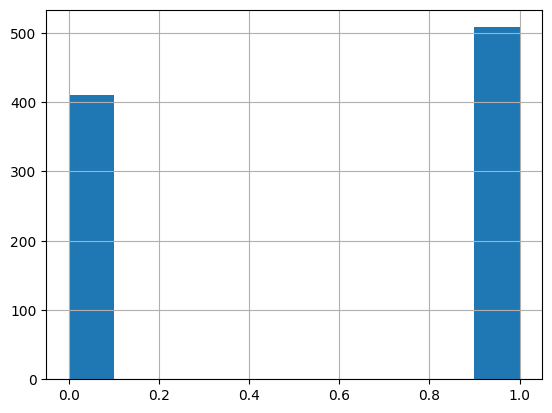

In [6]:
data['HeartDisease'].hist()

In [7]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [8]:
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['ChestPainType'] = encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = encoder.fit_transform(data['ST_Slope'])

In [9]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


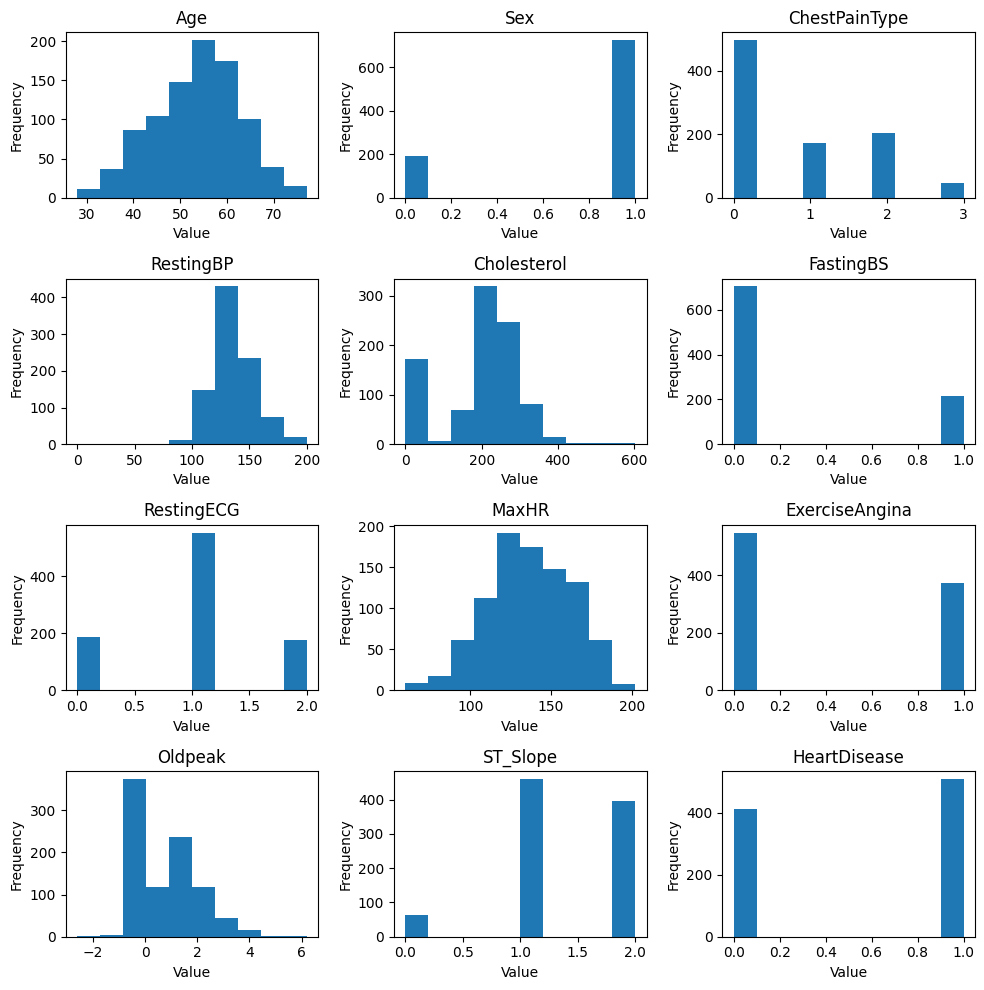

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
axs = axs.flatten()

for i, col_name in enumerate(data.columns):
    axs[i].hist(data[col_name])
    axs[i].set_title(col_name)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()


In [11]:
scaler = MinMaxScaler()
data[['Cholesterol']]  = scaler.fit_transform(data[['Cholesterol']])
data[['MaxHR']]  = scaler.fit_transform(data[['MaxHR']])
data[['Age']] = scaler.fit_transform(data[['Age']])
data[['RestingBP']] = scaler.fit_transform(data[['RestingBP']])
data[['Oldpeak']] = scaler.fit_transform(data[['Oldpeak']])

In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0


## Training

In [13]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape, x_test.shape

((734, 11), (184, 11))

In [16]:
y_train.shape, y_test.shape

((734,), (184,))

In [17]:
MLP = Sequential(
    [
        Dense(16, activation='sigmoid', input_shape=(11, )),
        Dense(8, activation='sigmoid'),
        Dense(2, activation='sigmoid')

    ]
)
MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = MLP.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=16)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5404 - loss: 0.6830 - val_accuracy: 0.4966 - val_loss: 0.6817
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5540 - loss: 0.6674 - val_accuracy: 0.4966 - val_loss: 0.6674
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5604 - loss: 0.6526 - val_accuracy: 0.5170 - val_loss: 0.6560
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5996 - loss: 0.6407 - val_accuracy: 0.5782 - val_loss: 0.6435
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6661 - loss: 0.6101 - val_accuracy: 0.6939 - val_loss: 0.6241
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7934 - loss: 0.6010 - val_accuracy: 0.7347 - val_loss: 0.6047
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8034 - loss: 0.5786 - val_accuracy: 0.7415 - val_loss: 0.5872
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.5623 - val_accuracy: 0.7823 - val_loss

In [18]:
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_val = history.history['val_loss']
acc_val = history.history['val_accuracy']

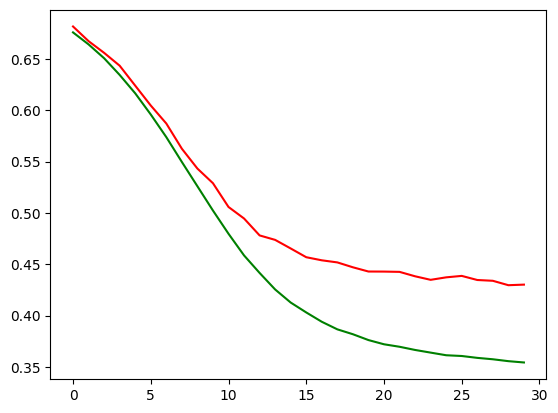

In [19]:
plt.plot(loss_train, label='Training Loss', color='g')
plt.plot(loss_val, label='Validation Loss', color='r')